In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
df = pd.read_csv('./dataset/cleaned.csv')

In [30]:
df_dummies = df.filter(['city', 'state', 'event_type', 'flight_condition','flight_operation', 'sightseeing', 'second_pilot'], axis=1)

In [31]:
# One-hot encode 'city', 'state', 'event_type', 'flight_condition','flight_operation', 'sightseeing', 'second_pilot'

df_dummies = pd.get_dummies(df_dummies, columns=['city', 'state', 'event_type', 'flight_condition','flight_operation', 'sightseeing', 'second_pilot'], drop_first=True)

In [32]:
df_dummies.head(1)

,city_AGUA DULCE,city_ALBUQUERQUE,city_ANAHUAC,city_ANDOVER,city_ANGLETON,city_ANOKA,city_ARCADIA,city_ARECIBO,city_ARGYLE,city_ATLANTA,...,flight_operation_PERS,flight_operation_POSI,flight_operation_PUBF,flight_operation_PUBL,flight_operation_PUBS,flight_operation_PUBU,flight_operation_SKYD,flight_operation_UNK,sightseeing_True,second_pilot_True
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [33]:
# making death and injuries as either 1 or 0

for i in range(len(df['deaths_and_injuries'])):
    if df['deaths_and_injuries'][i] > 0:
        df['deaths_and_injuries'][i] = 1

<ipython-input-33-4febe336a289>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['deaths_and_injuries'][i] = 1


In [34]:
df['deaths_and_injuries']

0        0.0
1        0.0
2        1.0
3        1.0
4        0.0
        ... 
14317    0.0
14318    1.0
14319    1.0
14320    0.0
14321    1.0
Name: deaths_and_injuries, Length: 14322, dtype: float64

In [67]:
X = df_dummies.values
y = df['deaths_and_injuries'].astype(int).values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [65]:
X_train[0].shape

(5166,)

### Basic Model, 10 layers

In [102]:
# model
model = Sequential()

# h1
model.add(Dense(4096, activation='relu', input_shape=(5166,)))

# h2
model.add(Dense(2048, activation='relu'))

# h3
model.add(Dense(1024, activation='relu'))

# h4
model.add(Dense(512, activation='relu'))

# h5
model.add(Dense(256, activation='relu'))

# h6
model.add(Dense(128, activation='relu'))

# h7
model.add(Dense(64, activation='relu'))

# h8
model.add(Dense(32, activation='relu'))

# h9
model.add(Dense(16, activation='relu'))

# h10
model.add(Dense(8, activation='relu'))

# output
model.add(Dense(1, activation='sigmoid'))

# Compile it
model.compile(loss='binary_crossentropy', optimizer='adam')

# Fit it
results = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=20,
                    validation_data=(X_test, y_test),
                    verbose=1) # <- printing

Epoch 1/20
42/42 [==============================] - 10s 225ms/step - loss: 0.6814 - val_loss: 0.6699
Epoch 2/20
42/42 [==============================] - 9s 216ms/step - loss: 0.6137 - val_loss: 0.7064s -
Epoch 3/20
42/42 [==============================] - 9s 222ms/step - loss: 0.4764 - val_loss: 0.7472
Epoch 4/20
42/42 [==============================] - 10s 234ms/step - loss: 0.3686 - val_loss: 0.9901
Epoch 5/20
42/42 [==============================] - 9s 218ms/step - loss: 0.2928 - val_loss: 1.2913
Epoch 6/20
42/42 [==============================] - 9s 225ms/step - loss: 0.2619 - val_loss: 1.1680
Epoch 7/20
42/42 [==============================] - 9s 224ms/step - loss: 0.2480 - val_loss: 1.5401
Epoch 8/20
42/42 [==============================] - 9s 225ms/step - loss: 0.2347 - val_loss: 1.6108
Epoch 9/20
42/42 [==============================] - 9s 222ms/step - loss: 0.2173 - val_loss: 2.0656
Epoch 10/20
42/42 [==============================] - 9s 223ms/step - loss: 0.2122 - val_loss: 1

In [103]:
preds_loss_10 = model.predict(X_test)

In [104]:
# Visualize the loss
train_loss_10 = results.history['loss']
test_loss_10 = results.history['val_loss']

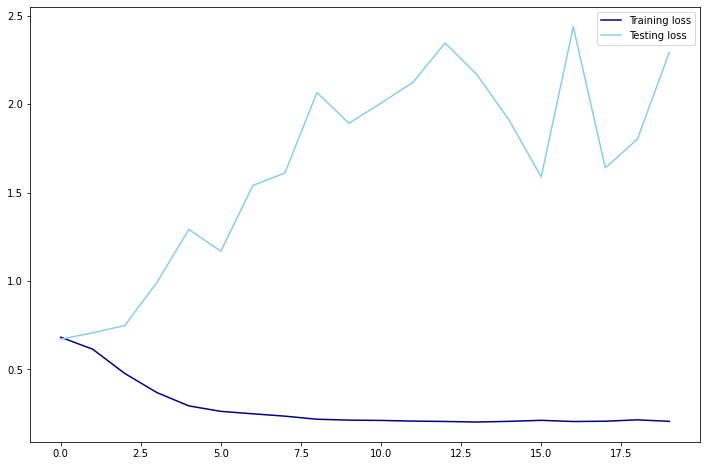

In [105]:
plt.figure(figsize=(12, 8))
plt.plot(train_loss_10, label='Training loss', color='navy')
plt.plot(test_loss_10, label='Testing loss', color='skyblue')
plt.legend();

plt.savefig('./images/nn_10.png', bbox_inches='tight')

### Basic Model, 5 layers A

In [106]:
# model
model = Sequential()

# h1
model.add(Dense(4096, activation='relu', input_shape=(5166,)))

# h2
model.add(Dense(2048, activation='relu'))

# h3
model.add(Dense(1024, activation='relu'))

# h4
model.add(Dense(512, activation='relu'))

# h5
model.add(Dense(256, activation='relu'))

# output
model.add(Dense(1, activation='sigmoid'))

# Compile it
model.compile(loss='binary_crossentropy', optimizer='adam')

# Fit it
results = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=20,
                    validation_data=(X_test, y_test),
                    verbose=1) # <- printing

Epoch 1/20
42/42 [==============================] - 10s 222ms/step - loss: 0.6770 - val_loss: 0.6667
Epoch 2/20
42/42 [==============================] - 9s 221ms/step - loss: 0.5766 - val_loss: 0.6970ss: 0.
Epoch 3/20
42/42 [==============================] - 9s 223ms/step - loss: 0.4395 - val_loss: 0.8282
Epoch 4/20
42/42 [==============================] - 9s 219ms/step - loss: 0.3464 - val_loss: 1.1062
Epoch 5/20
42/42 [==============================] - 9s 219ms/step - loss: 0.2853 - val_loss: 1.1095
Epoch 6/20
42/42 [==============================] - 9s 215ms/step - loss: 0.2545 - val_loss: 1.3759
Epoch 7/20
42/42 [==============================] - 9s 215ms/step - loss: 0.2386 - val_loss: 1.4604
Epoch 8/20
42/42 [==============================] - 9s 224ms/step - loss: 0.2301 - val_loss: 1.4217
Epoch 9/20
42/42 [==============================] - 9s 225ms/step - loss: 0.2267 - val_loss: 1.7116
Epoch 10/20
42/42 [==============================] - 9s 212ms/step - loss: 0.2152 - val_loss:

In [107]:
preds_loss_a = model.predict(X_test)

In [108]:
# Visualize the loss
train_loss_a = results.history['loss']
test_loss_a = results.history['val_loss']

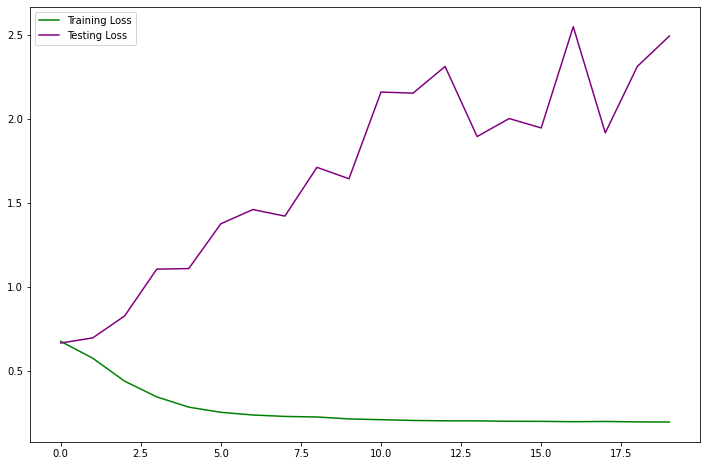

In [109]:
plt.figure(figsize=(12, 8))

plt.plot(train_loss_a, label='Training Loss', color='green')
plt.plot(test_loss_a, label='Testing Loss', color='purple')

plt.legend();

plt.savefig('./images/nn_a.png', bbox_inches='tight')

### Basic Model, 5 layers B

In [110]:
# model
model = Sequential()

# h1
model.add(Dense(4096, activation='relu', input_shape=(5166,)))

# h2
model.add(Dense(1024, activation='relu'))

# h3
model.add(Dense(256, activation='relu'))

# h4
model.add(Dense(64, activation='relu'))

# h5
model.add(Dense(16, activation='relu'))

# output
model.add(Dense(1, activation='sigmoid'))

# Compile it
model.compile(loss='binary_crossentropy', optimizer='adam')

# Fit it
results = model.fit(X_train, y_train,
                    batch_size=512,
                    epochs=20,
                    validation_data=(X_test, y_test),
                    verbose=1) # <- printing

Epoch 1/20
21/21 [==============================] - 6s 239ms/step - loss: 0.6784 - val_loss: 0.6683
Epoch 2/20
21/21 [==============================] - 5s 241ms/step - loss: 0.5865 - val_loss: 0.7227
Epoch 3/20
21/21 [==============================] - 5s 238ms/step - loss: 0.4484 - val_loss: 0.7680
Epoch 4/20
21/21 [==============================] - 5s 236ms/step - loss: 0.3658 - val_loss: 0.8673
Epoch 5/20
21/21 [==============================] - 5s 229ms/step - loss: 0.3147 - val_loss: 1.0484
Epoch 6/20
21/21 [==============================] - 5s 236ms/step - loss: 0.2773 - val_loss: 1.0940
Epoch 7/20
21/21 [==============================] - 5s 232ms/step - loss: 0.2631 - val_loss: 1.0433
Epoch 8/20
21/21 [==============================] - 5s 237ms/step - loss: 0.2527 - val_loss: 1.1572
Epoch 9/20
21/21 [==============================] - 5s 239ms/step - loss: 0.2438 - val_loss: 1.1658
Epoch 10/20
21/21 [==============================] - 5s 252ms/step - loss: 0.2309 - val_loss: 1.3039

In [111]:
preds_loss_b = model.predict(X_test)

In [112]:
# Visualize the loss
train_loss_b = results.history['loss']
test_loss_b = results.history['val_loss']

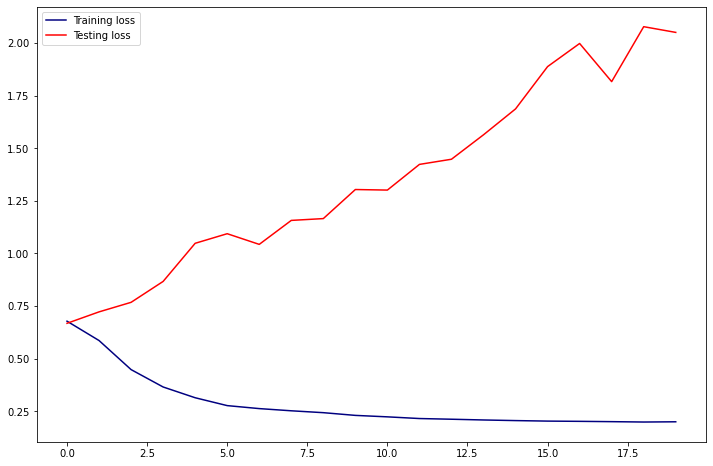

In [113]:
plt.figure(figsize=(12, 8))

plt.plot(train_loss_b, label='Training loss', color='navy')
plt.plot(test_loss_b, label='Testing loss', color='red')

plt.legend();

plt.savefig('./images/nn_b.png', bbox_inches='tight')

===

### Model with L2 Regularizer, 5 layers B

In [114]:
# model
model = Sequential()

# h1
model.add(Dense(4096, activation='relu', input_shape=(5166,), kernel_regularizer=l2(.001)))

# h2
model.add(Dense(1024, activation='relu', kernel_regularizer=l2(.001)))

# h3
model.add(Dense(256, activation='relu', kernel_regularizer=l2(.001)))

# h4
model.add(Dense(64, activation='relu', kernel_regularizer=l2(.001)))

# h5
model.add(Dense(16, activation='relu', kernel_regularizer=l2(.001)))

# output
model.add(Dense(1, activation='sigmoid'))

# Compile it
model.compile(loss='binary_crossentropy', optimizer='adam')

# Fit it
results = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=30,
                    validation_data=(X_test, y_test),
                    verbose=1) # <- printing

Epoch 1/30
42/42 [==============================] - 12s 263ms/step - loss: 2.2318 - val_loss: 0.8431
Epoch 2/30
42/42 [==============================] - 11s 253ms/step - loss: 0.7634 - val_loss: 0.7212
Epoch 3/30
42/42 [==============================] - 11s 259ms/step - loss: 0.7096 - val_loss: 0.7060
Epoch 4/30
42/42 [==============================] - 11s 252ms/step - loss: 0.6967 - val_loss: 0.7137
Epoch 5/30
42/42 [==============================] - 11s 258ms/step - loss: 0.6760 - val_loss: 0.7457
Epoch 6/30
42/42 [==============================] - 10s 250ms/step - loss: 0.6432 - val_loss: 0.7686
Epoch 7/30
42/42 [==============================] - 11s 260ms/step - loss: 0.5947 - val_loss: 0.8190
Epoch 8/30
42/42 [==============================] - 11s 258ms/step - loss: 0.5687 - val_loss: 0.8103
Epoch 9/30
42/42 [==============================] - 11s 257ms/step - loss: 0.5336 - val_loss: 0.8495
Epoch 10/30
42/42 [==============================] - 11s 254ms/step - loss: 0.5061 - val_lo

In [115]:
preds_l2_b = model.predict(X_test)

In [116]:
# Visualize loss
train_l2_b = results.history['loss']
test_l2_b = results.history['val_loss']

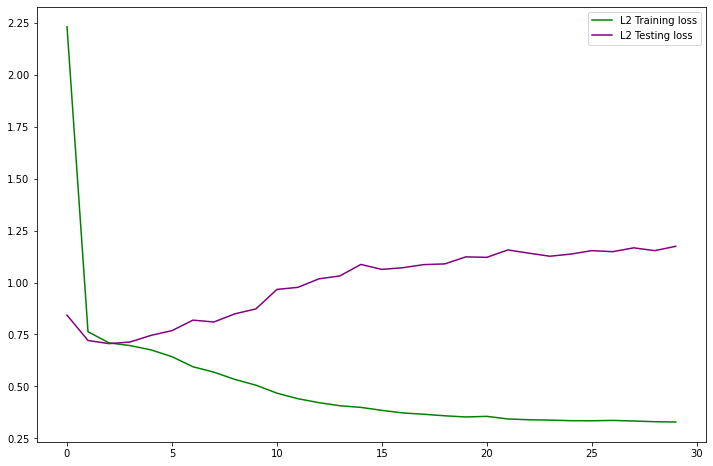

In [117]:
plt.figure(figsize=(12, 8))

plt.plot(train_l2_b, label='L2 Training loss', color='green')
plt.plot(test_l2_b, label='L2 Testing loss', color='purple')

plt.legend();

plt.savefig('./images/nn_rl2b.png', bbox_inches='tight')

### Model with L2 Regularizer, 5 layers A

In [118]:
# model
model = Sequential()

# h1
model.add(Dense(4096, activation='relu', input_shape=(5166,), kernel_regularizer=l2(.001)))

# h2
model.add(Dense(2048, activation='relu', kernel_regularizer=l2(.001)))

# h3
model.add(Dense(1024, activation='relu', kernel_regularizer=l2(.001)))

# h4
model.add(Dense(512, activation='relu', kernel_regularizer=l2(.001)))

# h5
model.add(Dense(256, activation='relu', kernel_regularizer=l2(.001)))

# output
model.add(Dense(1, activation='sigmoid'))

# Compile it
model.compile(loss='binary_crossentropy',  optimizer='adam')

# Fit it
results = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=20,
                    validation_data=(X_test, y_test),
                    verbose=1) # <- printing

Epoch 1/20
42/42 [==============================] - 14s 325ms/step - loss: 3.0101 - val_loss: 0.8834
Epoch 2/20
42/42 [==============================] - 13s 320ms/step - loss: 0.7561 - val_loss: 0.7099
Epoch 3/20
42/42 [==============================] - 13s 321ms/step - loss: 0.7014 - val_loss: 0.6954
Epoch 4/20
42/42 [==============================] - 14s 331ms/step - loss: 0.6895 - val_loss: 0.7083
Epoch 5/20
42/42 [==============================] - 14s 343ms/step - loss: 0.6653 - val_loss: 0.7373
Epoch 6/20
42/42 [==============================] - 14s 342ms/step - loss: 0.6324 - val_loss: 0.7584
Epoch 7/20
42/42 [==============================] - 14s 345ms/step - loss: 0.5882 - val_loss: 0.7995
Epoch 8/20
42/42 [==============================] - 15s 350ms/step - loss: 0.5587 - val_loss: 0.8073
Epoch 9/20
42/42 [==============================] - 15s 353ms/step - loss: 0.5306 - val_loss: 0.8134
Epoch 10/20
42/42 [==============================] - 15s 349ms/step - loss: 0.4987 - val_lo

In [119]:
preds_l2_a = model.predict(X_test)

In [120]:
# Visualize loss
train_l2_a = results.history['loss']
test_l2_a = results.history['val_loss']

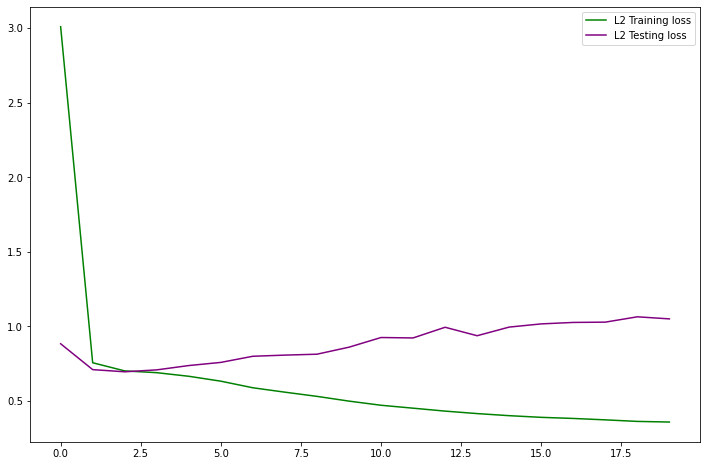

In [121]:
plt.figure(figsize=(12, 8))

plt.plot(train_l2_a, label='L2 Training loss', color='green')
plt.plot(test_l2_a, label='L2 Testing loss', color='purple')

plt.legend();

plt.savefig('./images/nn_rl2a.png', bbox_inches='tight')

===

### Dropout Model, 5 layers B

In [122]:
# model
model = Sequential()

# h1
model.add(Dense(4096, activation='relu', input_shape=(5166,)))
model.add(Dropout(.8))

# h2
model.add(Dense(1024, activation='relu'))
model.add(Dropout(.8))

# h3
model.add(Dense(256, activation='relu'))
model.add(Dropout(.8))

# h4
model.add(Dense(64, activation='relu'))
model.add(Dropout(.8))

# h5
model.add(Dense(16, activation='relu'))
model.add(Dropout(.8))

# output
model.add(Dense(1, activation='sigmoid'))

# Compile it
model.compile(loss='binary_crossentropy', optimizer='adam')

# Fit it
results = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=20,
                    validation_data=(X_test, y_test),
                    verbose=1) # <- printing

Epoch 1/20
42/42 [==============================] - 9s 194ms/step - loss: 0.7480 - val_loss: 0.6914
Epoch 2/20
42/42 [==============================] - 8s 189ms/step - loss: 0.7053 - val_loss: 0.6903
Epoch 3/20
42/42 [==============================] - 8s 188ms/step - loss: 0.6967 - val_loss: 0.6894
Epoch 4/20
42/42 [==============================] - 7s 174ms/step - loss: 0.6941 - val_loss: 0.6889
Epoch 5/20
42/42 [==============================] - 7s 172ms/step - loss: 0.6935 - val_loss: 0.6885
Epoch 6/20
42/42 [==============================] - 7s 172ms/step - loss: 0.6940 - val_loss: 0.6882
Epoch 7/20
42/42 [==============================] - 7s 172ms/step - loss: 0.6910 - val_loss: 0.6879
Epoch 8/20
42/42 [==============================] - 7s 176ms/step - loss: 0.6910 - val_loss: 0.6877
Epoch 9/20
42/42 [==============================] - 8s 181ms/step - loss: 0.6907 - val_loss: 0.6876
Epoch 10/20
42/42 [==============================] - 7s 176ms/step - loss: 0.6898 - val_loss: 0.6875

In [123]:
preds_dropout_b = model.predict(X_test)

In [124]:
train_dropout_b = results.history['loss']
test_dropout_b = results.history['val_loss']

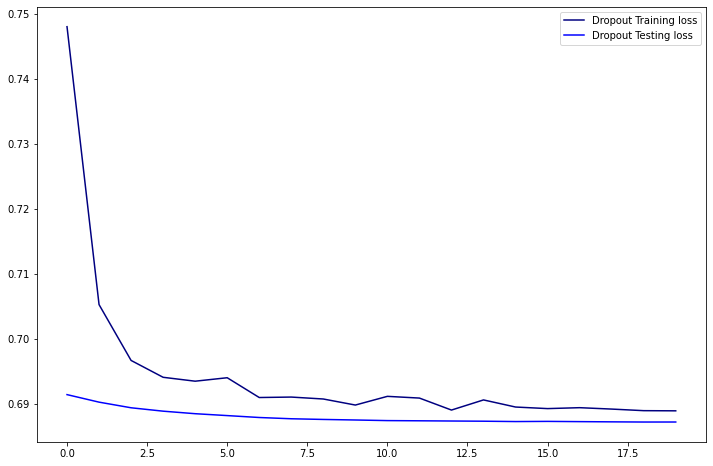

In [138]:
plt.figure(figsize=(12, 8))

plt.plot(train_dropout_b, label='Dropout Training loss', color='navy')
plt.plot(test_dropout_b, label='Dropout Testing loss', color='blue')

plt.legend();

plt.savefig('./images/nn_drop_b.png', bbox_inches='tight')

===

### Dropout Model, 5 layers A

In [126]:
# model
model = Sequential()

# h1
model.add(Dense(4096, activation='relu', input_shape=(5166,)))
model.add(Dropout(.8))

# h2
model.add(Dense(1024, activation='relu'))
model.add(Dropout(.8))

# h3
model.add(Dense(256, activation='relu'))
model.add(Dropout(.8))

# h4
model.add(Dense(64, activation='relu'))
model.add(Dropout(.8))

# h5
model.add(Dense(16, activation='relu'))
model.add(Dropout(.8))

# output
model.add(Dense(1, activation='sigmoid'))

# Compile it
model.compile(loss='binary_crossentropy', optimizer='adam')

# Fit it
results = model.fit(X_train, y_train,
                    batch_size=512,
                    epochs=20,
                    validation_data=(X_test, y_test),
                    verbose=1) # <- printing

Epoch 1/20
21/21 [==============================] - 6s 266ms/step - loss: 0.7290 - val_loss: 0.6923
Epoch 2/20
21/21 [==============================] - 5s 252ms/step - loss: 0.7040 - val_loss: 0.6914
Epoch 3/20
21/21 [==============================] - 5s 261ms/step - loss: 0.6954 - val_loss: 0.6907
Epoch 4/20
21/21 [==============================] - 5s 256ms/step - loss: 0.6954 - val_loss: 0.6902
Epoch 5/20
21/21 [==============================] - 5s 252ms/step - loss: 0.6946 - val_loss: 0.6897
Epoch 6/20
21/21 [==============================] - 5s 255ms/step - loss: 0.6921 - val_loss: 0.6893
Epoch 7/20
21/21 [==============================] - 6s 263ms/step - loss: 0.6906 - val_loss: 0.6889
Epoch 8/20
21/21 [==============================] - 6s 264ms/step - loss: 0.6910 - val_loss: 0.6886
Epoch 9/20
21/21 [==============================] - 5s 256ms/step - loss: 0.6912 - val_loss: 0.6884
Epoch 10/20
21/21 [==============================] - 5s 252ms/step - loss: 0.6904 - val_loss: 0.6882

In [127]:
preds_dropout_a = model.predict(X_test)

In [128]:
train_dropout_a = results.history['loss']
test_dropout_a = results.history['val_loss']

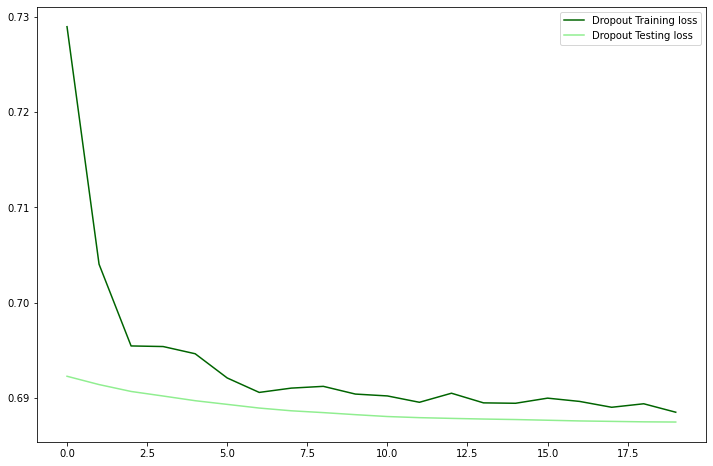

In [129]:
plt.figure(figsize=(12, 8))

plt.plot(train_dropout_a, label='Dropout Training loss', color='darkgreen')
plt.plot(test_dropout_a, label='Dropout Testing loss', color='lightgreen')

plt.legend();

plt.savefig('./images/nn_drop_a.png', bbox_inches='tight')

===

### Add early stops

In [130]:
# model
model = Sequential()

# h1
model.add(Dense(4096, activation='relu', input_shape=(5166,)))
model.add(Dropout(.8))

# h2
model.add(Dense(1024, activation='relu'))
model.add(Dropout(.8))

# h3
model.add(Dense(256, activation='relu'))
model.add(Dropout(.8))

# h4
model.add(Dense(64, activation='relu'))
model.add(Dropout(.8))

# h5
model.add(Dense(16, activation='relu'))
model.add(Dropout(.8))

# output
model.add(Dense(1, activation='sigmoid'))
early_stop = EarlyStopping(patience=5)

# Compile it
model.compile(loss='binary_crossentropy', optimizer='adam')

# Fit it
results = model.fit(X_train, y_train,
                    batch_size=512,
                    epochs=20,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop],
                    verbose=1) # <- printing

Epoch 1/20
21/21 [==============================] - 6s 271ms/step - loss: 0.7550 - val_loss: 0.6919
Epoch 2/20
21/21 [==============================] - 5s 257ms/step - loss: 0.7067 - val_loss: 0.6912
Epoch 3/20
21/21 [==============================] - 5s 255ms/step - loss: 0.6952 - val_loss: 0.6905
Epoch 4/20
21/21 [==============================] - 5s 247ms/step - loss: 0.6963 - val_loss: 0.6900
Epoch 5/20
21/21 [==============================] - 5s 259ms/step - loss: 0.6936 - val_loss: 0.6896
Epoch 6/20
21/21 [==============================] - 5s 250ms/step - loss: 0.6930 - val_loss: 0.6893
Epoch 7/20
21/21 [==============================] - 5s 247ms/step - loss: 0.6925 - val_loss: 0.6889
Epoch 8/20
21/21 [==============================] - 5s 255ms/step - loss: 0.6913 - val_loss: 0.6886
Epoch 9/20
21/21 [==============================] - 5s 248ms/step - loss: 0.6921 - val_loss: 0.6884
Epoch 10/20
21/21 [==============================] - 5s 249ms/step - loss: 0.6903 - val_loss: 0.6882

In [131]:
preds_es = model.predict(X_test)

In [132]:
# Visualize loss
train_es = results.history['loss']
test_es = results.history['val_loss']

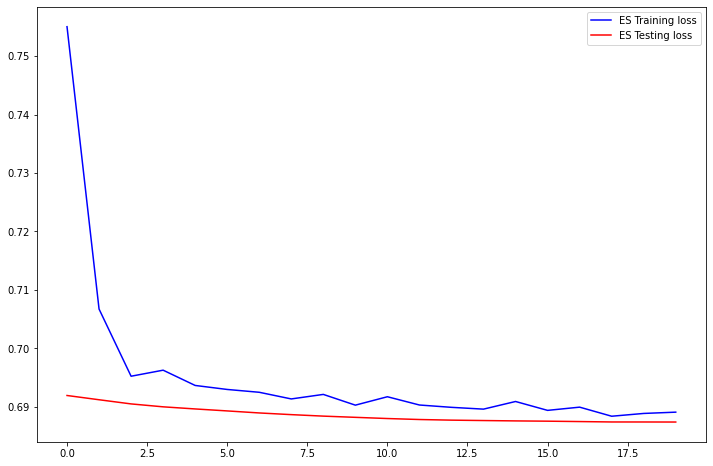

In [133]:
plt.figure(figsize=(12, 8))

plt.plot(train_es, label='ES Training loss', color='blue')
plt.plot(test_es, label='ES Testing loss', color='red')

plt.legend();

plt.savefig('./images/nn_es.png', bbox_inches='tight')

### Add early stops, drop and regularizer

In [139]:
# model
model = Sequential()

# h1
model.add(Dense(4096, activation='relu', input_shape=(5166,), kernel_regularizer=l2(.001)))
model.add(Dropout(.8))

# h2
model.add(Dense(1024, activation='relu', kernel_regularizer=l2(.001)))
model.add(Dropout(.8))

# h3
model.add(Dense(256, activation='relu', kernel_regularizer=l2(.001)))
model.add(Dropout(.8))

# h4
model.add(Dense(64, activation='relu', kernel_regularizer=l2(.001)))
model.add(Dropout(.8))

# h5
model.add(Dense(16, activation='relu', kernel_regularizer=l2(.001)))
model.add(Dropout(.8))

# output
model.add(Dense(1, activation='sigmoid'))
early_stop = EarlyStopping(patience=5)

# Compile it
model.compile(loss='binary_crossentropy', optimizer='adam')

# Fit it
results = model.fit(X_train, y_train,
                    batch_size=512,
                    epochs=50,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop],
                    verbose=1) # <- printing

Epoch 1/50
21/21 [==============================] - 8s 346ms/step - loss: 4.3663 - val_loss: 2.6318
Epoch 2/50
21/21 [==============================] - 7s 345ms/step - loss: 2.3372 - val_loss: 2.0696
Epoch 3/50
21/21 [==============================] - 7s 353ms/step - loss: 1.8818 - val_loss: 1.6931
Epoch 4/50
21/21 [==============================] - 7s 355ms/step - loss: 1.5639 - val_loss: 1.4343
Epoch 5/50
21/21 [==============================] - 7s 345ms/step - loss: 1.3408 - val_loss: 1.2464
Epoch 6/50
21/21 [==============================] - 7s 334ms/step - loss: 1.1786 - val_loss: 1.1092
Epoch 7/50
21/21 [==============================] - 7s 343ms/step - loss: 1.0587 - val_loss: 1.0081
Epoch 8/50
21/21 [==============================] - 7s 337ms/step - loss: 0.9720 - val_loss: 0.9347
Epoch 9/50
21/21 [==============================] - 7s 336ms/step - loss: 0.9083 - val_loss: 0.8806
Epoch 10/50
21/21 [==============================] - 7s 334ms/step - loss: 0.8617 - val_loss: 0.8402

In [140]:
preds_es_rg = model.predict(X_test)

In [141]:
# Visualize loss
train_es_rg = results.history['loss']
test_es_rg = results.history['val_loss']

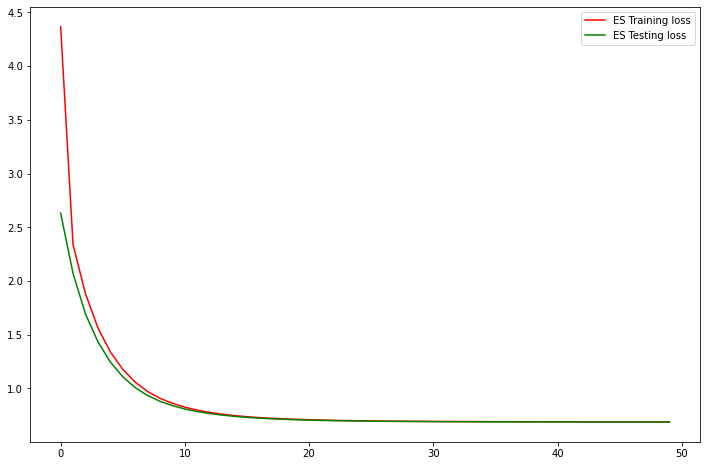

In [142]:
plt.figure(figsize=(12, 8))

plt.plot(train_es_rg, label='ES Training loss', color='Red')
plt.plot(test_es_rg, label='ES Testing loss', color='green')

plt.legend();

plt.savefig('./images/nn_es_rg.png', bbox_inches='tight')